## Project 2: Predicting Houses Sale Price using Multivariate Linear Regression

* Student name: Andrea Cabello
* Full Time Online Student
* Instructor name: Rafael Carrasco

## I. Overview

We are presented with a file: *'kc_house_data.csv'*. This dataset contains info on King County House Sales (WA). We are tasked with the following:
* clean data (apply what we learned on Phase 1), 
* explore data (aka EDA) to obtaing meaningful insights, 
* model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible.

## II. Business Problem


* What to look for when buying a home?
* What makes a residential property more expensive? (Location, Number of Rooms, Condition)
* Where are the most expensive houses located?
* Price per number of rooms (bedrooms/bathrooms)
* Price per sqft
* How does the condition of a property influence the price?
* How do year built and renovations influence the sale price?

## III. Understanding the Data
* Let's import the file and begin exploring.
* To understand what our features mean: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/kc_house_data.csv')

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


We'll begin by exploring one column at the time and find:
* what insight we could get from them,
* or how we could use them to engineer some useful features,
* which not to include them in the model

## Target Variable
### Price
This is our dependent variable or the one we want to predict.

## Feature Variables
The factors we suspect have an impact on the price.

* ### Date
Since we have Columns expressed in 'years' time such as 'yr_built' and 'year renovated', first instinct is to look at the data by year.

In [5]:
df['year_sold'] = df['date'].apply(lambda x: x[6:10])
df.year_sold.unique()
# we have houses sold in 2014 and 2015.
# so far I don't see how this feature could impact the price a house sells for.
# We'll find out more when we do correlation.  

array(['2014', '014', '015', '15', '14'], dtype=object)

* ### Bedrooms & Bathrooms

In [6]:
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [48]:
df.drop(df.loc[df['bedrooms']==33].index, inplace=True)

To better understand the way bathrooms are quantified, I went to Google and typed: 'what does .25 bathroom mean'.
I found out that:  "what Realtors now call a Full Bathroom (1) consists of a sink, toilet, bathtub and shower.
Because each of those items counts as .25, the convention is to call a Bathroom missing one or more a fractional Bath" [source](https://rosskaplan.com/2018/02/the-case-for-the-1-25-bath-or-the-1-375-bath/#:~:text=At%20least%2C%20that's%20what%20Realtors,is%20a%203%2F4%20Bath.) .

In [8]:
df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

* ### Floors

In [9]:
df.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [10]:
df.floors.value_counts()

1.0    10672
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

We'll make a new column 'rooms_per_floor' using ('bedrooms' + 'bathrooms') / 'floors'.

In [11]:
df['rooms_per_floor'] = (df['bedrooms'] + df['bathrooms']) / df['floors']

In [53]:
df['rooms_per_floor'] = [round(i,2) for i in df.rooms_per_floor]

In [54]:
df.rooms_per_floor.unique()

array([ 4.  ,  2.62,  3.  ,  7.  ,  5.  ,  8.5 ,  4.5 ,  2.75,  5.5 ,
        2.67,  4.75,  4.67,  3.5 ,  2.5 ,  3.33,  5.75,  3.75,  2.38,
        3.25,  1.17,  3.83,  6.75,  3.67,  6.25,  3.88,  2.  ,  7.5 ,
        4.83,  4.12,  5.25,  1.58,  7.25,  8.25,  2.25,  3.12,  2.12,
        1.88,  6.5 ,  3.38,  2.17,  6.  ,  4.25,  4.33,  1.75,  3.62,
        7.75,  8.  ,  8.75,  4.38,  9.  ,  2.88,  1.67,  4.62,  1.33,
        2.9 ,  2.33,  5.17,  5.33,  3.2 ,  2.83,  1.5 ,  3.17,  1.83,
        2.6 ,  6.17,  5.83,  1.25,  4.17, 10.  ,  5.12,  3.8 ,  1.92,
        1.9 ,  9.75,  4.88,  3.3 ,  1.2 ,  2.8 ,  5.67,  2.08,  2.7 ,
        2.2 ,  3.6 ,  2.3 ,  9.5 ,  7.83,  3.1 ,  6.88, 11.  ,  5.4 ,
        5.38,  0.83,  2.1 ,  5.62,  3.42,  1.42,  2.58,  1.62, 10.75,
        1.8 ,  1.6 ,  7.17,  2.92, 10.5 ,  2.42,  3.4 ,  4.6 ,  5.6 ,
        4.4 ,  2.4 , 11.75,  9.25,  3.7 , 12.  ,  1.71,  1.  ,  1.57,
       11.5 ,  5.88, 15.25,  1.29,  6.38,  5.2 ,  4.3 ,  7.67,  3.43,
        1.36,  1.4 ,

In [55]:
df.rooms_per_floor.value_counts()

3.25     2094
4.00     1855
2.75     1806
3.00     1690
4.75     1632
         ... 
5.60        1
1.29        1
3.70        1
3.43        1
11.75       1
Name: rooms_per_floor, Length: 130, dtype: int64

In [57]:
df.rooms_per_floor.describe()

count    21596.000000
mean         4.003967
std          1.416580
min          0.750000
25%          3.000000
50%          3.750000
75%          4.750000
max         15.250000
Name: rooms_per_floor, dtype: float64

In [60]:
df.drop(df.loc[df['rooms_per_floor']==15.25].index, inplace=True)

In [61]:
df.drop(df.loc[df['rooms_per_floor']==0.75].index, inplace=True)

In [64]:
df.rooms_per_floor.describe()

count    21594.000000
mean         4.003597
std          1.414403
min          0.830000
25%          3.000000
50%          3.750000
75%          4.750000
max         12.000000
Name: rooms_per_floor, dtype: float64

* ### sqft_living,	sqft_lot, sqft_above, sqft_basement

These columns are  measurements of the area of a property expressed in square feet. Compared to 'rooms_per_floor', it's just another way to measure the living area but in different units.  These will most likely have multicollinearity with the number of rooms per floor so I won't inlcude them in my first attempt.

* ### Waterfront

In [65]:
#dealing with nan values for waterfront feature
df.waterfront = df.waterfront.fillna('unknown')
df.waterfront = df.waterfront.replace(0.0, 'no')
df.waterfront = df.waterfront.replace(1.0, 'yes')

In [66]:
df.waterfront.unique()

array(['unknown', 'no', 'yes'], dtype=object)

* ### Views

In [67]:
# not sure if it's all that relevant
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

* ### Overall condition of the house

We have two columns with info on overall condition. After some additional googling I found that:
* **'condition'** summarizes grade and age in a scale from 1 to 5 where 1 = 'poor' and 5 = 'Very Good'
* **'grade'** represents the construction quality of improvements in a scale from 1 to 13 where 1-3 = 'Falls short of minimum building standards and  13 = 'Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.'
Since this two are most likely multicollinear, I choose to work with 'condition' because is more scalable model wise.
Thinking about model scalability, I decide to work wit *'condition'*

In [68]:
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [69]:
df.condition.unique()

array([3, 5, 4, 1, 2])

In [70]:
df.condition.value_counts()

3    14018
4     5677
5     1700
2      170
1       29
Name: condition, dtype: int64

* ### Year Built

In [71]:
df.yr_built.unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [72]:
df.yr_built.describe()

count    21594.000000
mean      1970.997083
std         29.374284
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [73]:
df.yr_built.value_counts()

2014    558
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

* ### Year Renovated

In [74]:
df.yr_renovated.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [75]:
df.yr_renovated.isna().sum()

0

In [76]:
# 78% of our data has a value of zero for year renovated, which we are assuming it means never renovated
# we only have 744 entries with a renovation year.
# maybe we should do a feature  'renovated': yes, no and unknown breakdown
df.yr_renovated.value_counts()

no         17008
unknown     3842
yes          744
Name: yr_renovated, dtype: int64

In [77]:
df['yr_renovated'] = df.yr_renovated.fillna('unknown')

In [78]:
to_replace = [1991., 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.]

In [79]:
df['yr_renovated'] = df.yr_renovated.replace(to_replace=to_replace, value='yes')

In [80]:
df['yr_renovated'] = df.yr_renovated.replace(0.0, 'no')

In [81]:
df['renovation'] = df['yr_renovated'] 

In [82]:
df.renovation.value_counts()

no         17008
unknown     3842
yes          744
Name: renovation, dtype: int64

* ### Latitude & Longitude

Let's combine them in a tuple.

In [83]:
df['geo_location'] = tuple(zip(df['lat'], df['long']))

It sounds like a good idea to find the 'geo_location' of a point of reference like the center of the city, to calculate the distance from the properties to the point of reference. 
King County's main economic center is Seattle.

In [84]:
import sklearn.metrics as metrics
from math import sqrt
from haversine import haversine

In [85]:
# Defining Point of reference location:
Seattle = [47.6219, -122.3517]

Create lists to append the values we will obtain for distance between the location point of the property and the center point.

In [86]:
distance_from_seattle = []
for i in df['geo_location']:
    distance_from_seattle.append((haversine((Seattle),(i), unit='mi')))
rounded_distance_from_seattle = [round(i,2) for i in distance_from_seattle]

df['distance_seattle'] = pd.Series(rounded_distance_from_seattle)

In [87]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,rooms_per_floor,renovation,geo_location,distance_seattle
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,unknown,0.0,...,98178,47.5112,-122.257,1340,5650,2014,4.00,no,"(47.5112, -122.257)",8.83
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,no,0.0,...,98125,47.7210,-122.319,1690,7639,014,2.62,yes,"(47.721000000000004, -122.319)",7.01
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,no,0.0,...,98028,47.7379,-122.233,2720,8062,015,3.00,unknown,"(47.7379, -122.23299999999999)",9.73
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,no,0.0,...,98136,47.5208,-122.393,1360,5000,014,7.00,no,"(47.5208, -122.39299999999999)",7.25
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,no,0.0,...,98074,47.6168,-122.045,1800,7503,015,5.00,no,"(47.6168, -122.045)",14.29


In [88]:
features = ['rooms_per_floor', 'waterfront', 'condition', 'yr_built', 'renovation', 'distance_seattle', 'price']

In [89]:
df1 = df[features]
df1 = pd.get_dummies(df1, drop_first=True)

In [90]:
df1.head()

,rooms_per_floor,condition,yr_built,distance_seattle,price,waterfront_unknown,waterfront_yes,renovation_unknown,renovation_yes
0,4.00,3,1955,8.83,221900.0,1,0,0,0
1,2.62,3,1951,7.01,538000.0,0,0,0,1
2,3.00,3,1933,9.73,180000.0,0,0,1,0
3,7.00,5,1965,7.25,604000.0,0,0,0,0
4,5.00,3,1987,14.29,510000.0,0,0,0,0


In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

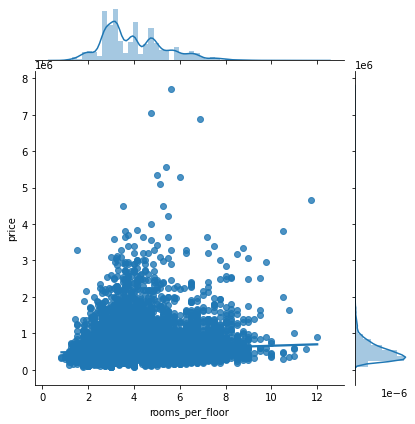

In [92]:
sns.jointplot('rooms_per_floor', 'price', data=df1, kind='reg')
plt.show()

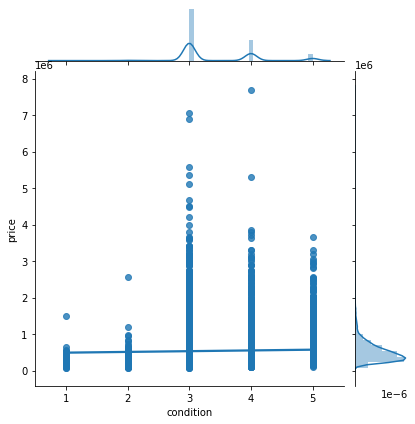

In [93]:
sns.jointplot('condition', 'price', data=df1, kind='reg')
plt.show()

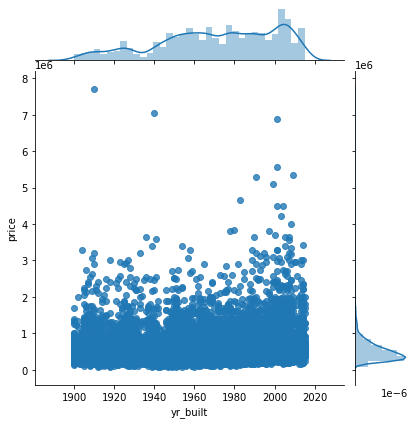

In [94]:
sns.jointplot('yr_built', 'price', data=df1, kind='reg')
plt.show()

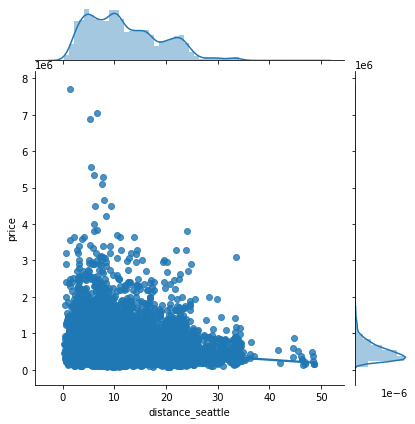

In [98]:
sns.jointplot('distance_seattle', 'price', data=df1, kind='reg')
plt.show()

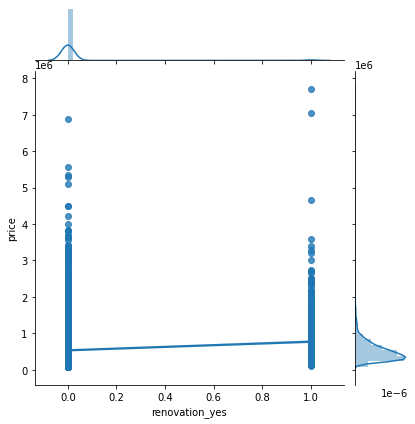

In [99]:
sns.jointplot('renovation_yes', 'price', data=df1, kind='reg')
plt.show()

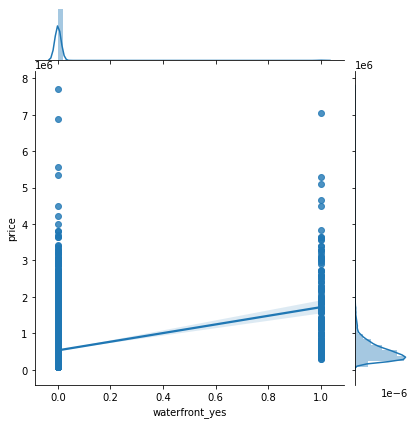

In [96]:
sns.jointplot('waterfront_yes', 'price', data=df1, kind='reg')
plt.show()

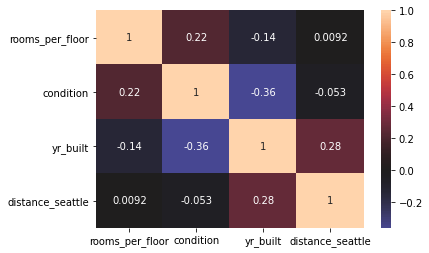

In [97]:
feats = ['rooms_per_floor', 'waterfront', 'condition', 'yr_built', 'renovation', 'distance_seattle']
corr = df[feats].corr()
sns.heatmap(corr, center=0, annot=True)
plt.show()